In [36]:
import pandas as pd
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit,logit
from copy import deepcopy

trainFile = r".\train-images.idx3-ubyte"
labelFile = r".\train-labels.idx1-ubyte"
train = idx2numpy.convert_from_file(trainFile)#simple import (took me half an hour)
label = idx2numpy.convert_from_file(labelFile)

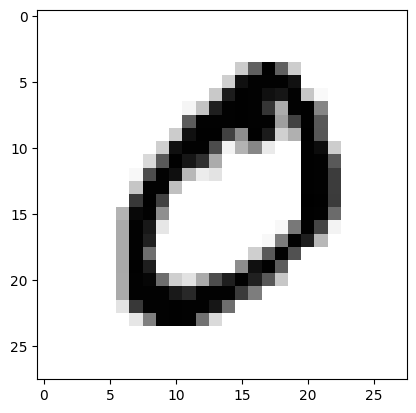

0


In [37]:
plt.imshow(train[1], cmap=plt.cm.binary)
plt.show()
print(label[1])

In [38]:

class Network(): #refer to the "documentation" buried within my notes
                #vectorized implementation of a basic neural networks
                #TODO add support for other cost functions/activaiton functions
                #TODO add support for deleting layers
    class Layer():

        def __init__(self,network,nodeCount,nodePreviousLayer=0):#keep node connections as an array for better performance(to avoid member access overhead)

            self.network = network
            self._layerCount = len(network._layers)

            self._nodeArray = np.zeros(nodeCount,float)#node array

            if(nodePreviousLayer):
                
                self._weightArray = np.random.rand(nodeCount,len(nodePreviousLayer._nodeArray)) #incoming weights array row = node to go in, column = weights of the node in
                self._biasArray = np.zeros(nodeCount)#bias array

                self._dBiasArray = np.zeros(nodeCount,float)#derivative of bias
                self._dWeightArray = np.zeros([nodeCount, len(nodePreviousLayer._nodeArray)], float)  # derivative of incoming weights
                self._dNodeArray = np.zeros(nodeCount,float)#delta array of ∂Activation/∂Node (refer to documentation)
                                                            #node = w*incoming + bias
                self._prevLayer = nodePreviousLayer #array of previous layer's data #DANGER MAKE SURE IT IS PASSING BY REFERENCE
                self._nextLayer : self.Layer #array of next layer's data, assigend/refreshed on connect()

        def _forwardProp(self): #TODO change this to support other activation functions
            self._nodeArray = np.matmul(self._weightArray,self._prevLayer._nodeArray)+self._biasArray
            self._nodeArray = self._activation(self._nodeArray)
            
        def _backProp(self,isLast = False):#backprop detail refer to "documentation"
            
            if(isLast):#is the last layer
                self._dNodeArray = self.network._dCostFunction(self.network._desiredOutput,self._nodeArray) 

            else:# is any other layer 
                self._dNodeArray = np.matmul(self._nextLayer._weightArray.T,self._nextLayer._dNodeArray)#the summation (should) is already in matrix multiplication
                self._dNodeArray = np.multiply(self._dNodeArray,self._dActivation(self._nodeArray))
            temp = np.transpose(self._weightArray)
            temp = temp*np.atleast_2d(self._prevLayer._nodeArray).T#I HAVE NO IDEA IF THIS IS CORECT OR NOT HELP
            self._dWeightArray += np.transpose(temp)*np.atleast_2d(self._dNodeArray).T# THIS IS SO GOING TO BUG ( it didnt yet i think)
            self._dBiasArray += self._dNodeArray#this one is simple tho yay

        def _optimize(self,learningRate):
            self._weightArray = self._weightArray - self._dWeightArray*learningRate/self.network.totalTrainData
            self._biasArray = self._biasArray - self._dBiasArray*learningRate/self.network.totalTrainData
            self._nodeArray = self._nodeArray*0

        def _activation(self, inArray):#sigmoid function
            return expit(inArray)   
        
        def _dActivation(self, inArray): #derivative for the sigmoid, this function takes in the activated output of the layer
            return np.multiply(inArray,1-inArray)

    _layers = []
    _desiredOutput = []#cached for use in backprop
    totalTrainData = 0

    def __init__(self, startCount):#start count initializes the first layer
        self._layers = []
        self._layers.append(self.Layer(self,startCount))

    def addLayer(self,nodeCount):#public interface to add new layers (not counting the starting layer)
        self._layers.append(self.Layer(self,nodeCount,self._layers[-1]))

    def setInputLayer(self,inputData):#public interface to set first layer data
        self._layers[0]._nodeArray = inputData.copy() #better be safe than sorry

    def connect(self): # connects all layers to the next one except first/last one
        for i in range(len(self._layers)-2):
            self._layers[i+1]._nextLayer = self._layers[i+2]

    def trainNetwork(self,desiredAnswer,answer=False):
        self._desiredOutput = desiredAnswer.copy()#cached for use in backprop

        for i in range(len(self._layers)-1):
            self._layers[i+1]._forwardProp()
            
        if(answer):
            return self._layers[-1]._nodeArray
        
        for i in range(len(self._layers)-1):
            self._layers[-i-1]._backProp(True if i == 0 else False)#tell the function that its the last and not to access the out of index element


    def optimizeNetwork(self,learningRate):
        temp = self._costFunction(self._desiredOutput,self._layers[-1]._nodeArray)
        print(temp)
        for i in range(len(self._layers)-1):
            self._layers[i+1]._optimize(learningRate)

        return temp

        

    def getResult(self, desiredAnswerNodes):#calculate the cost
        outputNodes=self._layers[-1]._nodeArray
        return self._costFunction(desiredAnswerNodes,outputNodes)
    
    def _costFunction(self, desired, output):#cost function, Mean squared error
        return np.sum(np.power(desired - output,2))
    
    def _dCostFunction(self, desired, output):
        return -2*(desired-output)

8.99999999999826
8.999999999998245
8.999999999998836
8.99999999999823
8.999999999998368
8.999999999998161
8.999999999998158
8.9999999999981
8.999999999998078
8.999999999998682
8.999999999997952
8.999999999997907
8.999999999997815
8.999999999997774
8.999999999997664
8.999999999997861
8.999999999997417
8.999999999998302
8.999999999997215
8.999999999997295
8.999999999997867
8.999999999996659
8.999999999996781
8.999999999996241
8.999999999995985
8.999999999995639
8.999999999996815
8.999999999994975
8.999999999994552
8.999999999994929
8.99999999999362
8.999999999995698
8.999999999992577
8.9999999999925
8.999999999990937
8.999999999990095
8.999999999989194
8.999999999987836
8.99999999998837
8.999999999985256
8.999999999983327
8.999999999988436
8.999999999981965
8.999999999978627
8.999999999973394
8.999999999972838
8.999999999979082
8.99999999996195
8.99999999996037
8.999999999950116
8.999999999943011
8.999999999935065
8.999999999936007
8.99999999993851
8.999999999909646
8.999999999928695
8.9

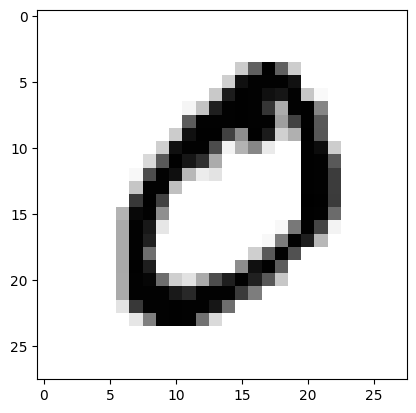

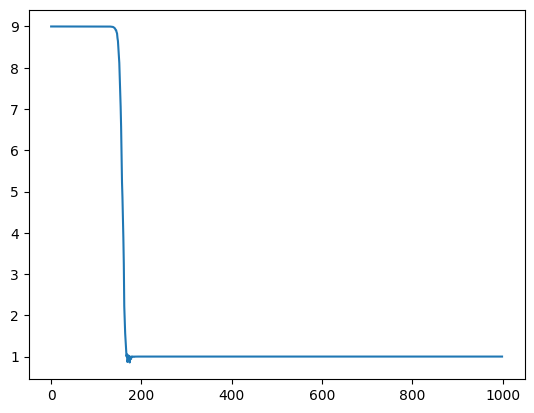

In [39]:
network = Network(784)
network.addLayer(64)
network.addLayer(64)
network.addLayer(10)
network.connect()
batch = 1
epoch = 1000
result = []
network.totalTrainData = batch*epoch

for ii in range(epoch):
    for i in range(batch):
        network.setInputLayer(train[i+(ii* batch)].flatten())
        hotEncode = np.zeros(10)
        hotEncode[label[i+(ii*batch)]] = 1
        network.trainNetwork(hotEncode)
    result.append(network.optimizeNetwork(0.05))

network.setInputLayer(train[1].flatten())
hotEncode = np.zeros(10)
hotEncode[label[1]] = 1
print(network.trainNetwork(hotEncode,True))

plt.imshow(train[1], cmap=plt.cm.binary)
plt.show()

plt.plot(result)     